In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, wilcoxon
import seaborn as sns

In [3]:
path = "/home/colombelli/Documents/Experiments05_ago/intersect/"

hom_exps = ["hom_geode", "hom_gr", "hom_relieff", "hom_su", "hom_wx"]
sin_exps = ["sin_geode", "sin_gr", "sin_relieff", "sin_su", "sin_wx"]

exps = [ "het", "hyb_borda_borda", "hyb_stbw_borda"] + hom_exps + sin_exps

In [4]:
stb_dict = {}
roc_dict = {}
acc_dict = {}

In [5]:
def add_experiment_stability(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    stb_dict[experiment] = df.stabilities.values
    return

def add_experiment_roc_auc(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    roc_dict[experiment] = df.mean_ROC_AUC.values
    return

def add_experiment_accuracy(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    acc_dict[experiment] = df.mean_ACC.values
    return

In [6]:
for e in exps:
    add_experiment_stability(e)
    add_experiment_roc_auc(e)
    add_experiment_accuracy(e)

In [7]:
x = pd.read_csv(path+exps[0]+"/final_results.csv").th_int.values

In [10]:
stb_dict['het']

array([-6.56383328e-05,  1.59724247e-01,  1.19422041e-01,  1.52498960e-01,
        1.98685162e-01,  2.29471355e-01,  2.45619858e-01,  2.62157241e-01,
        2.81593884e-01,  3.11968343e-01])

In [8]:
def plot_from_dicts(chosen_dict, selected=False, s_marker=None):
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    if not selected:
        for key, values in chosen_dict.items():
            ax.plot(values, label=key, marker=s_marker)
    
    else:
        for key, values in chosen_dict.items():
            if key in selected:
                ax.plot(values, label=key, marker=s_marker)
                sns.lineplot(x="timepoint", y="signal", data=fmri)
        
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    return

### Plotting stabilities

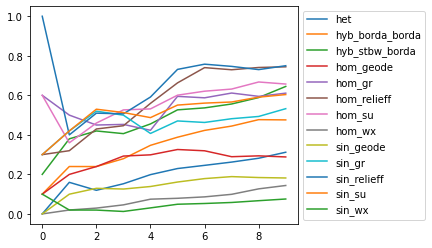

In [86]:
plot_from_dicts(stb_dict)

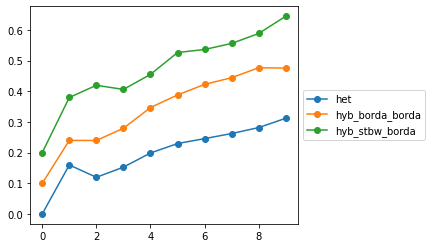

In [87]:
picked_exps = ["hyb_borda_borda", "hyb_stbw_borda", "het"]
plot_from_dicts(stb_dict, picked_exps, 'o')

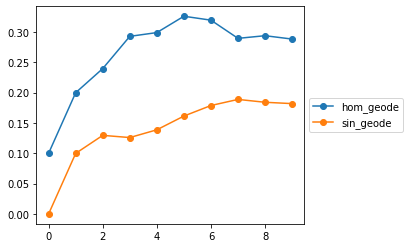

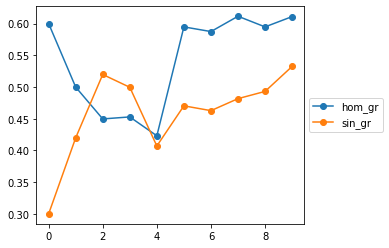

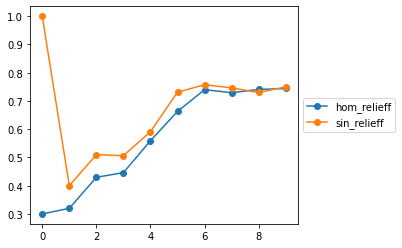

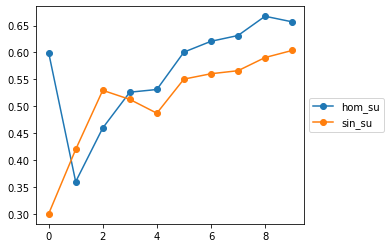

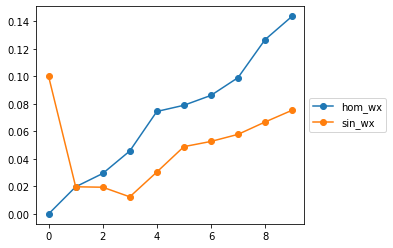

In [66]:
for exp in hom_exps:
    selector = exp.split('_')[1]
    plot_from_dicts(stb_dict, [exp, "sin_"+selector], 'o')

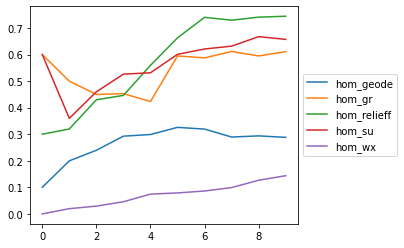

In [65]:
plot_from_dicts(stb_dict, hom_exps)

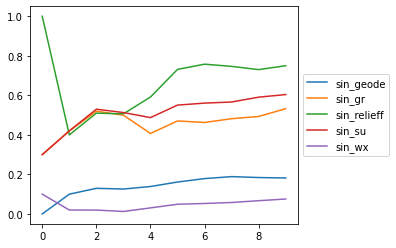

In [51]:
plot_from_dicts(stb_dict, sin_exps)

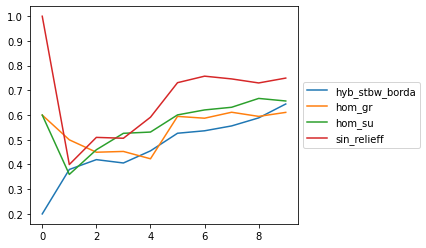

In [67]:
plot_from_dicts(stb_dict, ["hyb_stbw_borda", "sin_relieff", "hom_gr", "hom_su"])

### Plotting ROC AUCs

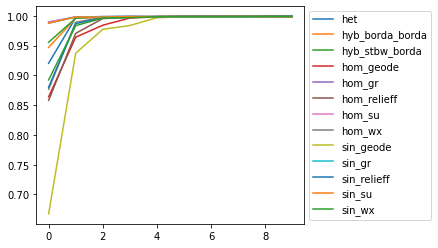

In [88]:
plot_from_dicts(roc_dict)

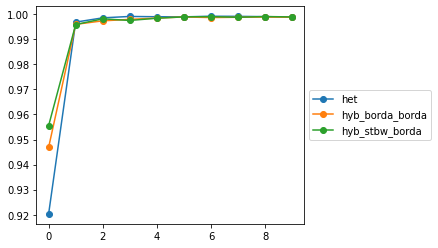

In [89]:
picked_exps = ["hyb_borda_borda", "hyb_stbw_borda", "het"]
plot_from_dicts(roc_dict, picked_exps, 'o')

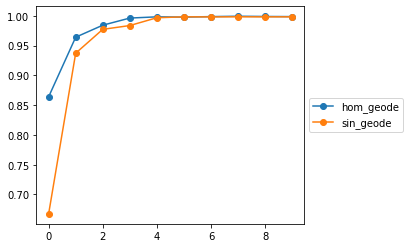

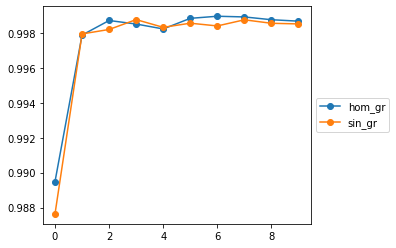

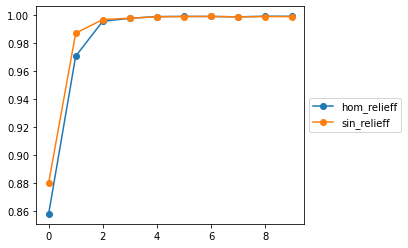

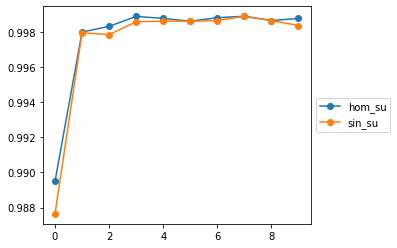

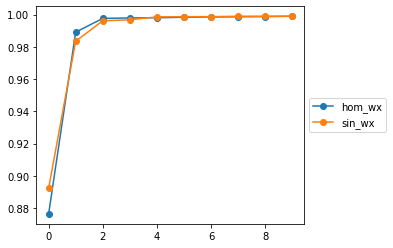

In [90]:
for exp in hom_exps:
    selector = exp.split('_')[1]
    plot_from_dicts(roc_dict, [exp, "sin_"+selector], 'o')

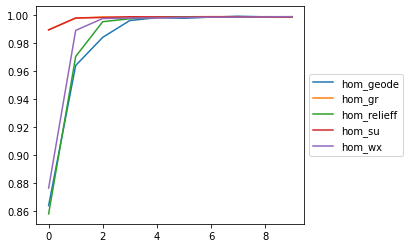

In [91]:
plot_from_dicts(roc_dict, hom_exps)

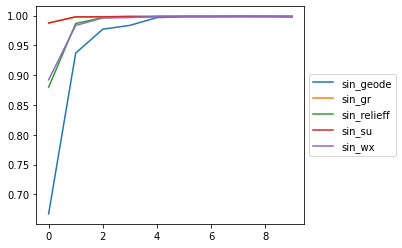

In [92]:
plot_from_dicts(roc_dict, sin_exps)

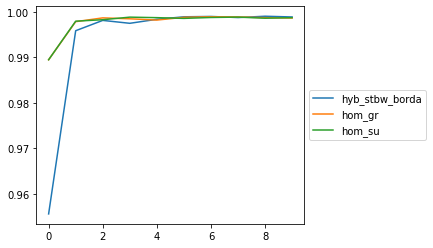

In [93]:
plot_from_dicts(roc_dict, ["hyb_stbw_borda", "hom_gr", "hom_su"])

### Plotting Accuracies

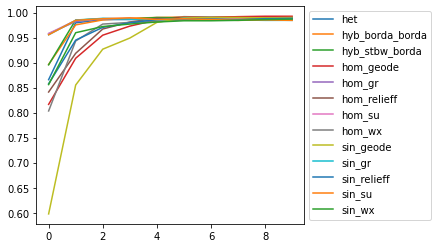

In [95]:
plot_from_dicts(acc_dict)